In [10]:
import numpy as np

def unique(list1):

    # initialize a null list
    unique_list = []

    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

# step-1: 

at low M field use $E = g_f \mu_B B  m_F$, to get $g_f$, then compare with theoratical value of $g_f = \pm $ 1/3 for 85 and $\pm 1/2$ for 87 

$g_f = $Eh/\mu_B B = $. also affirmed by the theoratical prediction of frequency ratio $E(85)/E(87) = g_f(85)/g_f(87)=2/3$, and absorption ratio is related to population of 85 and 87 (the sample contain more 85)


$g_F = \frac{E}{\mu_B B m_F}= \frac{E}{\mu_B  B}$

In [11]:
# B = 0.06*1e-3 # T
B = 0.09*1e-3 # T

muB_in_frequency = 14 # GHz / T


In [12]:
frequency = 380 #kHz
frequency / muB_in_frequency / B *1e-6

0.30158730158730157

In [13]:
frequency = 590 #kHz
frequency / muB_in_frequency / B *1e-6

0.4682539682539683

# low field, derive g factors

total angular momemtum $F = I \pm J$, where $J=1/2$ is the electron spin

for $^{87}Rb$ $I = 3/2$, hyperfine levels are $F = 1,2$

for  $^{85}Rb$ $I = 5/2$, hyperfine levels are $F = 2,3$


In [14]:
muB_in_frequency = 14 # GHz / T

def gJ(J, S, L):
    return 1+(J*(J+1)+S*(S+1)-L*(L+1))/(2*J*(J+1))

def gF(gJ, F, J, I):
    return gJ*(F*(F+1) + J*(J+1)-I*(I+1))/(2*F*(F+1))

def weekfield_frequency(B,#in mili Tesla
              mF,
              gF):
    return  gF * muB_in_frequency * B *1e-3 * mF # in GHz

def weekfield_transition_frequency(B,#in mili Tesla
              delta_mF,
              gF):
    return  weekfield_frequency(B, delta_mF,gF)

In [74]:
muB_in_frequency

14

In [73]:
hyperfine_spacing = 6.8

B = 1e-1

x = 2 /hyperfine_spacing * muB_in_frequency*B  *1e-3# unitless
x 

0.00041176470588235307

In [80]:
def strongfield_transition_frequency(F,mF1,mF2,B , I = 3/2):
    assert abs(mF1 - mF2) == 1 or abs(mF1 - mF2) == 0
    if I == 3/2:
        hyperfine_spacing = 6.8 #GHz   
    elif I == 5/2:
        hyperfine_spacing = 3 #GHz   
    x = 2 /hyperfine_spacing * muB_in_frequency*B  *1e-3# unitless
    # print(x)
    # big_mf = np.max([mF1,mF2])
    # small_mf = np.min([mF1,mF2])
    # return   hyperfine_spacing /2 * ( np.sqrt(1+4*big_mf/(2*I + I)*x + x**2)  - np.sqrt(1+4*small_mf/(2*I + I)*x + x**2)   ) *1e3 # MHz
    return   hyperfine_spacing /2 * ( np.sqrt(1+4*mF1/(2*I + I)*x + x**2)  - np.sqrt(1+4*mF2/(2*I + I)*x + x**2)   ) *1e3 # MHz

$g_J == 2$ always becasue S = J, dletaw = 6.8GHz * h, x \approx 1e-3$ 

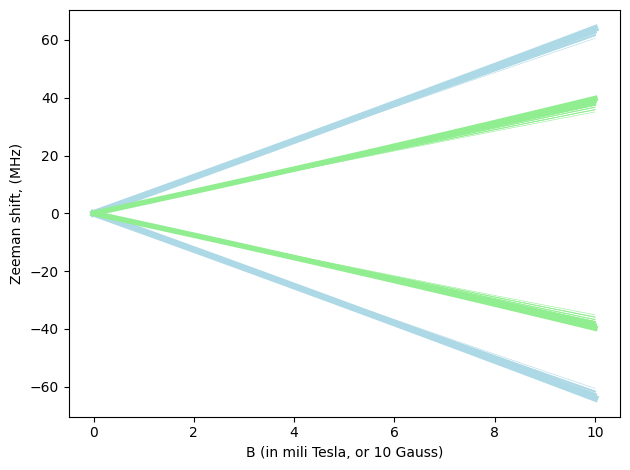

In [83]:
import matplotlib.pyplot as plt

heuristical_lw = {
    3/2: {
        (2,1):0.1,
        (1,2):0.1,
        (1,0):0.3,
        (0,1):0.3,
        (0,-1):0.6,
        (-1,0):0.6,
        (-1,-2):1.2,
        (-2,-1):1.2,
    },
    5/2: {
        (2,3):0.1,
        (3,2):0.1,
        (1,2):0.15,
        (2,1):0.15,
        (1,0):0.15,
        (0,1):0.15,
        (0,-1):0.4,
        (-1,0):0.4,
        (-1,-2):0.6,
        (-2,-1):0.6,
        (-3,-2):1,
        (-2,-3):1
    }
}

B_list = np.linspace(0,10,100)
for I, name,F_list in zip([3/2,5/2],
                      ['87','85'],
                      [[1,2],[2,3]]):
    for F in F_list:
        # Get index of allowed transitions
        mF_list =unique([(i,j) for i in range(-1*F, F+1) for j in range(-1*F, F+1) if np.abs(i-j) == 1])
        for (mF1,mF2) in mF_list:
            freq = []
            for B in B_list:
                freq.append(strongfield_transition_frequency(F = F,mF1=mF1,mF2=mF2,B =B, I = I))
            plt.plot(B_list,freq,label =f'{mF1}->{mF2}',lw=heuristical_lw[I][(mF1,mF2)]*4,color = 'lightblue' if I == 3/2 else 'lightgreen')
# plt.legend()
plt.xlabel('B (in mili Tesla, or 10 Gauss)')
plt.ylabel('Zeeman shift, (MHz)')
plt.tight_layout()

# plt.ylim(20,40)
# plt.xlim(8,10)